#Import Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Load Data

In [10]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df= pd.read_csv(url)
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
442,2014,GMC,SAVANA 1500 CARGO CONV AWD,VAN - CARGO,5.3,8,A4,E,25.3,19.3,22.6,12,362
434,2014,GMC,SAVANA 1500 CARGO,VAN - CARGO,4.3,6,A4,X,17.1,12.7,15.1,19,347
293,2014,DODGE,AVENGER,MID-SIZE,2.4,4,A4,X,11.2,8.0,9.8,29,225
889,2014,PORSCHE,BOXSTER S,TWO-SEATER,3.4,6,M6,Z,11.9,8.6,10.4,27,239
631,2014,KIA,SPORTAGE AWD,SUV - SMALL,2.0,4,A6,X,12.7,9.7,11.4,25,262


In [11]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [13]:
# drop categorical and useless columns
df=df.drop(['MODELYEAR','MAKE','MODEL','VEHICLECLASS','TRANSMISSION','FUELTYPE'],axis=1)

In [14]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


Engine Size "0.874154	" > CYLINDERS "0.849685".

FUELCONSUMPTION_COMB_MPG "-0.90" most correlated than the others.

In [15]:
df.columns

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

#Feature selection

In [18]:
df=df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY',\
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB'], axis=1)

In [20]:
df.sample(5)

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
552,5.0,21,306
538,5.6,22,294
999,2.7,24,274
847,1.6,32,200
19,2.0,32,202


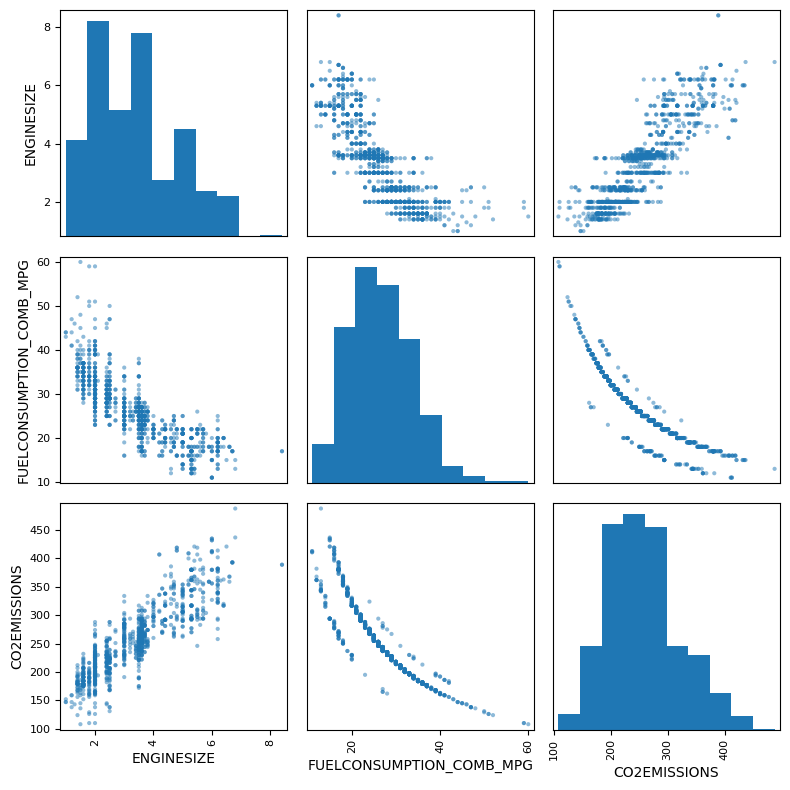

In [47]:
axes = pd.plotting.scatter_matrix(df, figsize=(8,8))

for ax in axes.flatten():
    ax.yaxis.label.set_rotation(90)
    ax.xaxis.label.set_rotation(0)

plt.tight_layout()
plt.show()

#Extract input features and labels

In [48]:
X=df.iloc[:,[0,1]].to_numpy()
y=df.iloc[:,[2]].to_numpy()

#Data preprocessing

In [49]:
from sklearn import preprocessing

std_scaler=preprocessing.StandardScaler().fit(X)
std_X=std_scaler.transform(X)

In [55]:
pd.DataFrame(std_X).describe().round(1)

,0,1
count,1067.0,1067.0
mean,0.0,-0.0
std,1.0,1.0
min,-1.7,-2.1
25%,-1.0,-0.7
50%,0.0,-0.1
75%,0.7,0.6
max,3.6,4.5


#Create train and test sets

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(std_X, y, test_size=0.2, random_state=42)

#Build Multiple Linear Regression Model

In [78]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

coef=model.coef_
intercept=model.intercept_

print("Coefficients: ", coef)
print("Intercept: ", intercept)

Coefficients:  [[ 25.27339614 -37.4381472 ]]
Intercept:  [256.29072488]


In [79]:
#Get back original value
mean = std_scaler.mean_
std_dev = np.sqrt(std_scaler.var_)

#unstandardized
coef_original = coef / std_dev
intercept_original = intercept-np.sum((mean*coef)/std_dev)

print("Coefficients: ", coef_original)
print("Intercept: ", intercept_original)

Coefficients:  [[17.8581369  -5.01502179]]
Intercept:  [329.1363967]


#Visualization

For Engine Size, y=mx+c

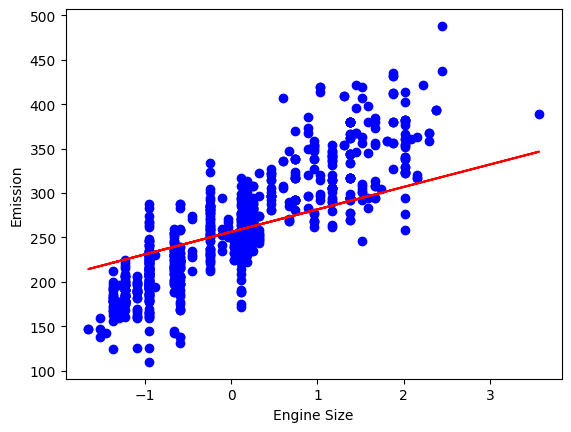

In [84]:
plt.scatter(X_train[:,0], y_train, color='blue')
plt.plot(X_train[:,0], coef[0,0]*X_train[:,0]+intercept[0], color='red')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

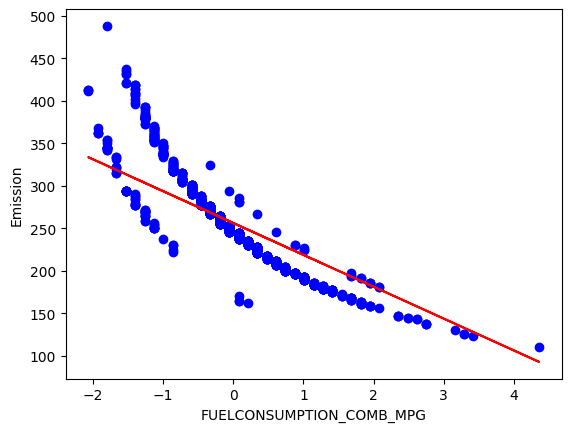

In [86]:
plt.scatter(X_train[:,1], y_train, color='blue')
plt.plot(X_train[:,1], coef[0,1]*X_train[:,1]+intercept[0], color='red')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")
plt.show()

#Determine best parameters for ENGINESIZE (Simple Linear Regression Model)

In [88]:
X_train2=X_train[:,0]

model2=linear_model.LinearRegression()
model2.fit(X_train2.reshape(-1,1), y_train)
coef2=model2.coef_
intercept2=model2.intercept_

print("Coefficients: ", coef2)
print("Intercept: ", intercept2)

Coefficients:  [[55.18408797]]
Intercept:  [256.77183014]


##Visualization

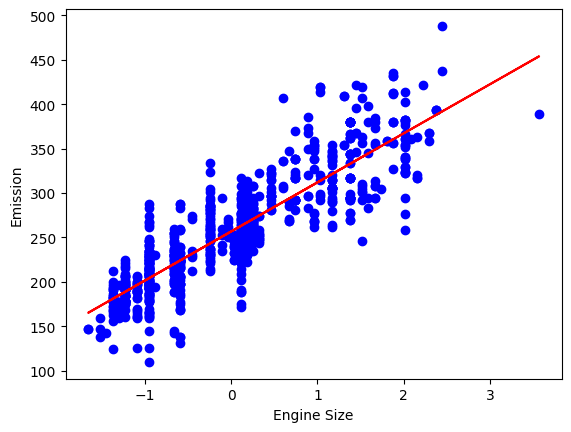

In [89]:
plt.scatter(X_train2, y_train, color='blue')
plt.plot(X_train2, coef2[0]*X_train2+intercept2, color='red')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

##Visualization (On Test dataset)

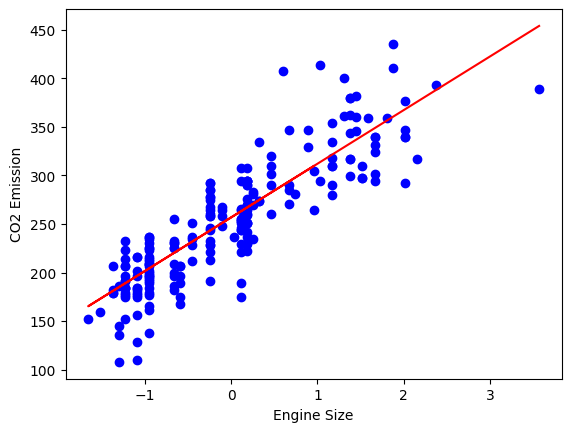

In [91]:
X_test2=X_test[:,0]

plt.scatter(X_test2, y_test, color='blue')
plt.plot(X_test2, coef2[0]*X_test2+intercept2, color='red')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emission')
plt.show()

#Try for feature 2: FUELCONSUMPTION_COMB_MPG

In [92]:
X_train3=X_train[:,1]

model3=linear_model.LinearRegression()
model3.fit(X_train3.reshape(-1,1), y_train)
coef3=model3.coef_
intercept3=model3.intercept_

print("Coefficients: ", coef3)
print("Intercept: ", intercept3)

Coefficients:  [[-58.51827989]]
Intercept:  [256.09392179]


##Visualization

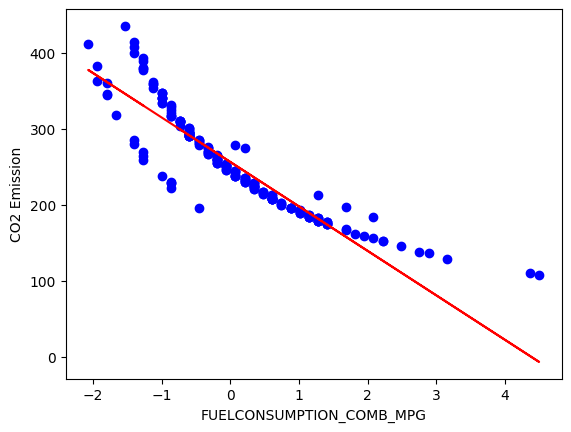

In [97]:
X_test3=X_test[:,1]

plt.scatter(X_test3, y_test, color='blue')
plt.plot(X_test3, coef3[0]*X_test3+intercept3, '-r')
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('CO2 Emission')
plt.show()